# Case Study:

With a Sales Transactional you have to analyze what are the preferences of our customers. Make a group of different types of clients and give Insights of what each group represents . Remember to make use of the CTR column, which explains what percentage of customers viewed the ad, clicked on it, and subsequently made a purchase.

Data Source: Data randomly generated by me.

#### NOTE: The main ideas are in English and the code notes in Spanish. This is to show the proficency in both languages.

In [1]:
#importar las librerías

import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importar el excel y revisar las primeras 5 filas de cada columna

data = pd.read_excel('TRANSACTIONAL_EVENTO23.xlsx')
print(data.head())

   Transaction Id  Ticket de Compra  Edad Plataforma  Tiempo en Sesion  \
0               1             10698    27     Pagina                62   
1               2              6868    29        App                44   
2               3             10929    33        App                34   
3               4              7100    32     Pagina                14   
4               5             19047    35        App                 6   

  Tipo de Pago  Paginas Vistas  CTR  
0       Debito               5    1  
1      Credito               8    0  
2      Credito               2    1  
3       Debito               5    1  
4      Credito               4    0  


In [2]:
#revisar si hay celdas en blanco

print(data.isnull().sum())

Transaction Id      0
Ticket de Compra    0
Edad                0
Plataforma          0
Tiempo en Sesion    0
Tipo de Pago        0
Paginas Vistas      0
CTR                 0
dtype: int64


In [3]:
#ordenar de mayor a menor por ticket de compra

data_sorted = data.sort_values(by='Ticket de Compra', ascending=False)

data_sorted.head()

,Transaction Id,Ticket de Compra,Edad,Plataforma,Tiempo en Sesion,Tipo de Pago,Paginas Vistas,CTR
1356,1357,19991,24,App,29,Promo Bancaria,5,0
105,106,19989,40,App,34,Debito,1,0
1783,1784,19985,30,App,15,Credito,1,0
1091,1092,19981,39,App,15,Credito,5,1
1917,1918,19979,40,App,12,Debito,4,0


In [4]:
# Obtener los valores únicos en la columna 'Tipo de Pago'

valores_unicos = data['Tipo de Pago'].unique()
print("\nValores únicos en la columna Tipo de Pago:")
print(data['Tipo de Pago'].value_counts())



Valores únicos en la columna Tipo de Pago:
Tipo de Pago
Credito           1221
Promo Bancaria     485
Debito             294
Name: count, dtype: int64


In [5]:
# Obtener los Valores promedios, así como los más y menos frecuentes para la columna Ticket de Compra

# Valor más bajo y cuántas veces aparece
min_value = data['Ticket de Compra'].min()
min_count = (data['Ticket de Compra'] == min_value).sum()

# Valor más alto y cuántas veces aparece
max_value = data['Ticket de Compra'].max()
max_count = (data['Ticket de Compra'] == max_value).sum()


# Valor promedio y cuántas veces aparece
mean_value = data['Ticket de Compra'].mean()
mean_count = (data['Ticket de Compra'] == mean_value).sum()

# Mostrar los resultados
print(f"Valor más bajo: {min_value}, Aparece {min_count} veces")
print(f"Valor más alto: {max_value}, Aparece {max_count} veces")
print(f"Valor promedio: {mean_value}, Aparece {mean_count} veces")


Valor más bajo: 4003, Aparece 1 veces
Valor más alto: 19991, Aparece 1 veces
Valor promedio: 12073.547, Aparece 0 veces


# Clustering

##### La siguiente Gráfica es un "Elbow Method" ó Método del Codo.

#### Parece que empieza una caída libre  (visualizando de izquierda a derecha) , cuando empieza a estabilizarse es el número recomendado de clusters a elegir. 

#### Es recomendado si es que no sabemos cuantos clusters tener, en mi caso ya sé que quiero 4 clusters para los tickets de compra (Ticket Bajo, Medio, Alto y Premium)

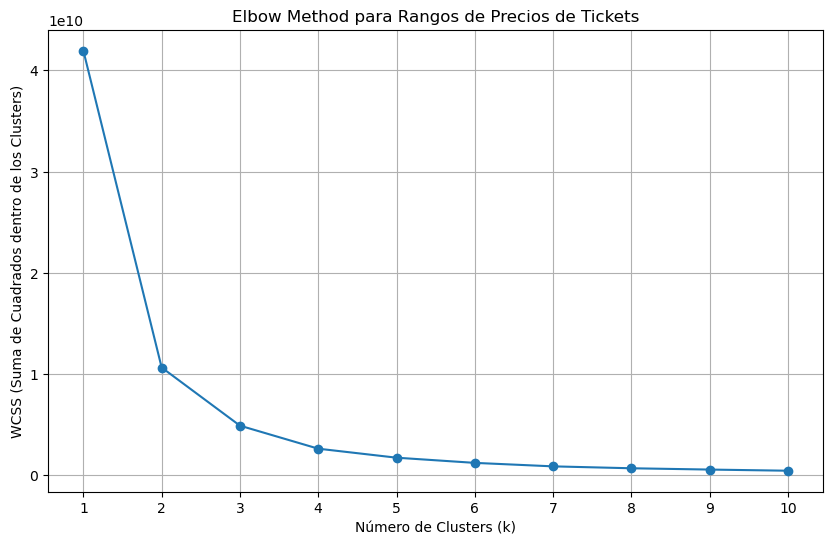

In [6]:
# Ver de manera visual cuántos clusters deberíamos tener 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar los valores de WCSS
wcss_values = []

# Calcular WCSS para diferentes valores de k (número de clusters)
for k in range(1, 11):  # Probamos desde 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Establecer n_init explícitamente
    kmeans.fit(data['Ticket de Compra'].values.reshape(-1, 1))
    wcss_values.append(kmeans.inertia_)

# Graficar el codo (elbow)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Suma de Cuadrados dentro de los Clusters)')
plt.title('Elbow Method para Rangos de Precios de Tickets')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [7]:
# Quiero 5 grupos de compradores. 

# Se calculará mediante Cuartiles; que es dividir mis datos en valores iguales.
# Para este caso son 3 Cuartiles que representan ciertos porcentajes (%); 25 50 y 75.
# Del 0 al 25% de mis datos será el grupo uno, 25 a 50 grupo dos, 50 a 75 grupo tres y de 75 al 100 grupo cuatro.

# Calcular los cuartiles de los valores de Ticket de Compra
q1 = data['Ticket de Compra'].quantile(0.25)
q2 = data['Ticket de Compra'].quantile(0.5)
q3 = data['Ticket de Compra'].quantile(0.75)

# Definir los límites de los rangos usando los cuartiles
limite_bajo = q1
limite_medio = q2
limite_alto = q3

# Asignar cada valor de Ticket de Compra a un rango específico basado en los límites
def asignar_rango(ticket):
    if ticket <= limite_bajo:
        return 'Bajo'
    elif ticket <= limite_medio:
        return 'Medio'
    else:
        return 'Alto'

data['Rango'] = data['Ticket de Compra'].apply(asignar_rango)

# Mostrar los límites de los rangos
print(f"Límite del rango Bajo: {limite_bajo}")
print(f"Límite del rango Medio: {limite_medio}")
print(f"Límite del rango Alto: {limite_alto}")


Límite del rango Bajo: 8111.5
Límite del rango Medio: 12199.5
Límite del rango Alto: 15917.0


##### Tengo los siguientes Rangos de Tickets:

- Ticket Bajo 0 a 8000
- Ticket Medio 8001 a 12000
- Ticket Alto 12001 a 15000
- Ticket Premium 15001 a 20000

In [8]:
# Aquí agrego una nueva columna y en esta si el Ticket de Compra es Medio, alto Bajo o Premium

# Crear las condiciones para cada rango
condiciones = [
    (data['Ticket de Compra'] >= 4000) & (data['Ticket de Compra'] <= 8000),
    (data['Ticket de Compra'] >= 8001) & (data['Ticket de Compra'] <= 12000),
    (data['Ticket de Compra'] >= 12001) & (data['Ticket de Compra'] <= 15000),
    (data['Ticket de Compra'] >= 15001) & (data['Ticket de Compra'] <= 20000)
]

# Asignar etiquetas a cada rango
etiquetas = ['Ticket Bajo (4000 a 8000)', 'Ticket Medio(8001 a 12000)', 'Ticket Alto (12001 a 15000)', 'Ticket Premium(15001 a 20000)']

# Crear una nueva columna 'Rango' con los valores correspondientes
data['Rango'] = np.select(condiciones, etiquetas, default='Otro')

# Mostrar el DataFrame con la nueva columna 'Rango'
print(data.head())

   Transaction Id  Ticket de Compra  Edad Plataforma  Tiempo en Sesion  \
0               1             10698    27     Pagina                62   
1               2              6868    29        App                44   
2               3             10929    33        App                34   
3               4              7100    32     Pagina                14   
4               5             19047    35        App                 6   

  Tipo de Pago  Paginas Vistas  CTR                          Rango  
0       Debito               5    1     Ticket Medio(8001 a 12000)  
1      Credito               8    0      Ticket Bajo (4000 a 8000)  
2      Credito               2    1     Ticket Medio(8001 a 12000)  
3       Debito               5    1      Ticket Bajo (4000 a 8000)  
4      Credito               4    0  Ticket Premium(15001 a 20000)  


In [9]:
# Quiero revisar en mi dataframe cuántos clientes tienen Tickets de compra Premium, Alto, Bajo y medio
# Ordenaré las veces que aparece cada Ticket de mayor a menor. 

# Frecuencia, las veces que aparecen
# Porcentaje, las veces que aparecen (en %)
# Frecuencia Acumulada, la sumatoria de mis Tickets
# Frecuencia Acumulada (%), la sumatoria de mis Porcentajes

# Calcular el conteo de ocurrencias de cada valor en la columna 'Rango'
conteo_rango = data['Rango'].value_counts()

# Obtener el número total de tickets
total_tickets = len(data)

# Calcular el porcentaje de frecuencia para cada rango
porcentaje_frecuencia = (conteo_rango / total_tickets) * 100

# Calcular la frecuencia acumulada y el porcentaje de frecuencia acumulada
frecuencia_acumulada = conteo_rango.cumsum()
porcentaje_frecuencia_acumulada = (frecuencia_acumulada / total_tickets) * 100

# Crear un DataFrame para la distribución de frecuencia
df_frecuencia = pd.DataFrame({
    'Rango': conteo_rango.index,
    'Frecuencia': conteo_rango.values,
    'Porcentaje (%)': porcentaje_frecuencia.values,
    'Frecuencia Acumulada': frecuencia_acumulada.values,
    'Frecuencia Acumulada (%)': porcentaje_frecuencia_acumulada.values
})

# Ordenar el DataFrame por la frecuencia en orden descendente
df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

# Imprimir la distribución de frecuencia como tabla
print("Distribución de frecuencia de mayor a menor:")
print(df_frecuencia.to_string(index=False))

# Imprimir el número total de tickets
print("\nNúmero total de tickets:", total_tickets)


Distribución de frecuencia de mayor a menor:
                        Rango  Frecuencia  Porcentaje (%)  Frecuencia Acumulada  Frecuencia Acumulada (%)
Ticket Premium(15001 a 20000)         612           30.60                   612                     30.60
   Ticket Medio(8001 a 12000)         495           24.75                  1107                     55.35
    Ticket Bajo (4000 a 8000)         487           24.35                  1594                     79.70
  Ticket Alto (12001 a 15000)         406           20.30                  2000                    100.00

Número total de tickets: 2000


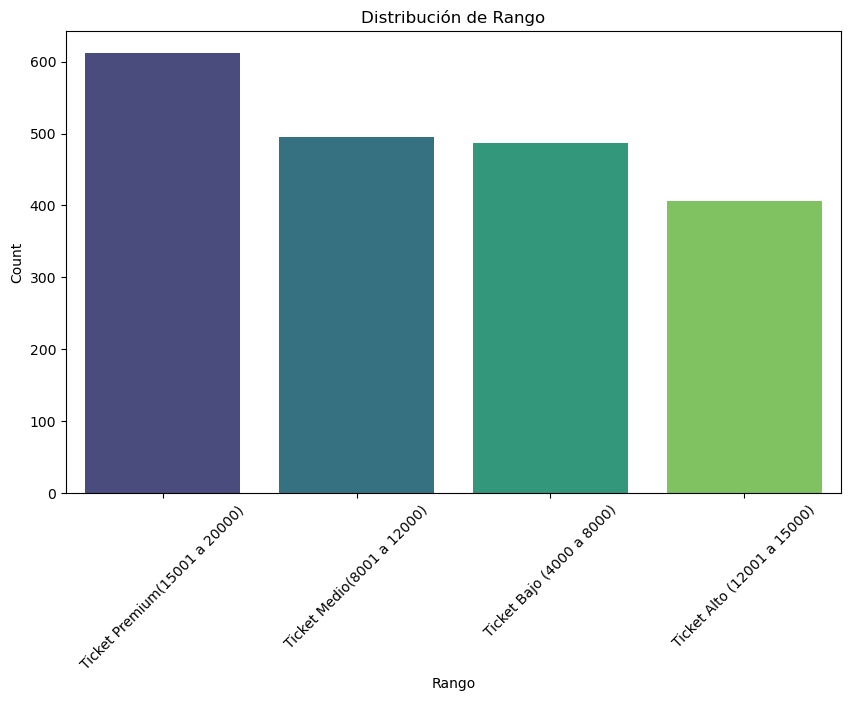

In [10]:
# Representación Visual
# Quiero revisar en mi dataframe cuántos clientes tienen Tickets de compra Premium, Alto, Bajo y medio
# Ordenaré las veces que aparece cada Ticket de mayor a menor. 

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la distribución de las categorías en 'Rango'
plt.figure(figsize=(10, 6))

# Calcular el orden de las categorías según el conteo
order = data['Rango'].value_counts().index

sns.countplot(data=data, x='Rango', palette='viridis', order=order)
plt.title('Distribución de Rango')
plt.xlabel('Rango')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


In [11]:
# Revisar que tipo son mis columnas, si numéricas o de texto 

data_info = data.dtypes.to_frame().reset_index()
data_info.columns = ['Column', 'Dtype']
print(data_info)

             Column   Dtype
0    Transaction Id   int64
1  Ticket de Compra   int64
2              Edad   int64
3        Plataforma  object
4  Tiempo en Sesion   int64
5      Tipo de Pago  object
6    Paginas Vistas   int64
7               CTR   int64
8             Rango  object


In [12]:
# ESTADISTICAS
# QUE CARACTERÍSTICAS PRESENTAN NUESTROS DISTINTOS RANGOS DE TICKETS. PARA LAS COLUMNAS NUMÉRICAS


# Define los rangos de ticket
rango_bajo = (4000, 8000)
rango_medio = (8001, 12000)
rango_alto = (12001, 15000)
rango_premium = (15001, 20000)


# Filtra el DataFrame para cada rango de ticket
data_bajo = data[(data['Ticket de Compra'] >= rango_bajo[0]) & (data['Ticket de Compra'] <= rango_bajo[1])]
data_medio = data[(data['Ticket de Compra'] >= rango_medio[0]) & (data['Ticket de Compra'] <= rango_medio[1])]
data_alto = data[(data['Ticket de Compra'] >= rango_alto[0]) & (data['Ticket de Compra'] <= rango_alto[1])]
data_premium = data[(data['Ticket de Compra'] >= rango_premium[0]) & (data['Ticket de Compra'] <= rango_premium[1])]

# Calcula las estadísticas descriptivas para cada grupo
estadisticas_bajo = data_bajo[['Paginas Vistas', 'CTR']].describe()
estadisticas_medio = data_medio[['Paginas Vistas', 'CTR']].describe()
estadisticas_alto = data_alto[['Paginas Vistas', 'CTR']].describe()
estadisticas_premium = data_premium[['Paginas Vistas', 'CTR']].describe()

# Imprime las estadísticas descriptivas
print("Estadísticas para Ticket Bajo:")
print(estadisticas_bajo)
print("\nEstadísticas para Ticket Medio:")
print(estadisticas_medio)
print("\nEstadísticas para Ticket Alto:")
print(estadisticas_alto)
print("\nEstadísticas para Ticket Premium:")
print(estadisticas_premium)


Estadísticas para Ticket Bajo:
       Paginas Vistas         CTR
count      487.000000  487.000000
mean         4.110883    0.496920
std          1.555564    0.500505
min          1.000000    0.000000
25%          3.000000    0.000000
50%          4.000000    0.000000
75%          5.000000    1.000000
max          8.000000    1.000000

Estadísticas para Ticket Medio:
       Paginas Vistas         CTR
count      495.000000  495.000000
mean         4.010101    0.551515
std          1.462728    0.497842
min          1.000000    0.000000
25%          3.000000    0.000000
50%          4.000000    1.000000
75%          5.000000    1.000000
max          8.000000    1.000000

Estadísticas para Ticket Alto:
       Paginas Vistas         CTR
count      406.000000  406.000000
mean         4.014778    0.524631
std          1.582240    0.500009
min          1.000000    0.000000
25%          3.000000    0.000000
50%          4.000000    1.000000
75%          5.000000    1.000000
max          8.00000

#### ¿Cómo Interpretar?

1. Conteo (count):

Para "Páginas Vistas": Hay un total de 487 observaciones para la variable "Páginas Vistas" en la categoría "Ticket Bajo".
Para "CTR": También hay 487 observaciones para la variable "CTR" en la misma categoría.
Media (mean):

Para "Páginas Vistas": La cantidad promedio de páginas vistas por observación en la categoría "Ticket Bajo" es aproximadamente 4.11.
Para "CTR": El promedio del CTR (proporción de clics respecto a impresiones) en la categoría "Ticket Bajo" es aproximadamente 0.1177 o un 11.77%.

2. Desviación estándar (std):

Para "Páginas Vistas": La desviación estándar de la cantidad de páginas vistas en la categoría "Ticket Bajo" es aproximadamente 1.556.
Para "CTR": La desviación estándar del CTR en la categoría "Ticket Bajo" es aproximadamente 0.0664.

3. Mínimo (min) y Máximo (max):

Para "Páginas Vistas": El valor mínimo de páginas vistas en la categoría "Ticket Bajo" es 1, mientras que el máximo es 8.
Para "CTR": El valor mínimo de CTR en la categoría "Ticket Bajo" es 0 (sin clics), y el máximo es 0.249 o un 24.9%.

4. Percentiles (25%, 50%, 75%):

Para "Páginas Vistas": El 25% de las observaciones tienen 3 páginas vistas o menos, el 50% tienen 4 páginas vistas o menos (la mediana), y el 75% tienen 5 páginas vistas o menos.
Para "CTR": El 25% de las observaciones tienen un CTR de 0.0591 o menos, el 50% tienen un CTR de 0.1192 o menos (la mediana), y el 75% tienen un CTR de 0.1716 o menos.

In [13]:
# ESTADISTICAS
# QUE CARACTERÍSTICAS PRESENTAN NUESTROS DISTINTOS RANGOS DE TICKETS. PARA NUESTRAS COLUMNAS DE TEXTO

# Define los rangos de ticket
rango_bajo = (4000, 8000)
rango_medio = (8001, 12000)
rango_alto = (12001, 15000)
rango_premium = (15001, 20000)

# Filtra el DataFrame para cada rango de ticket
data_bajo = data[(data['Ticket de Compra'] >= rango_bajo[0]) & (data['Ticket de Compra'] <= rango_bajo[1])]
data_medio = data[(data['Ticket de Compra'] >= rango_medio[0]) & (data['Ticket de Compra'] <= rango_medio[1])]
data_alto = data[(data['Ticket de Compra'] >= rango_alto[0]) & (data['Ticket de Compra'] <= rango_alto[1])]
data_premium = data[(data['Ticket de Compra'] >= rango_premium[0]) & (data['Ticket de Compra'] <= rango_premium[1])]

def obtener_estadisticas_object(data_group):
    stats = {}
    for col in data_group.select_dtypes(include=['object']).columns:
        value_counts = data_group[col].value_counts()
        most_common = value_counts.idxmax()
        least_common = value_counts.idxmin()
        suma_usos = value_counts[most_common] + value_counts[least_common]  # Suma entre el valor más y menos usado
        stats[col] = {
            'Valor más usado': most_common,
            'Frecuencia Valor más usado': value_counts.max(),
            'Valor menos usado': least_common,
            'Frecuencia Valor menos usado': value_counts.min(),
            'Total Valores': suma_usos,   
        }
    return pd.DataFrame(stats)

# Obtener estadísticas para cada grupo
estadisticas_bajo_obj = obtener_estadisticas_object(data_bajo)
estadisticas_medio_obj = obtener_estadisticas_object(data_medio)
estadisticas_alto_obj = obtener_estadisticas_object(data_alto)
estadisticas_premium_obj = obtener_estadisticas_object(data_premium)

# Imprimir las estadísticas obtenidas
print("Estadísticas para Ticket Bajo - Columnas Object:")
print(estadisticas_bajo_obj)
print("\nEstadísticas para Ticket Medio - Columnas Object:")
print(estadisticas_medio_obj)
print("\nEstadísticas para Ticket Alto - Columnas Object:")
print(estadisticas_alto_obj)
print("\nEstadísticas para Ticket Premium - Columnas Object:")
print(estadisticas_premium_obj)

Estadísticas para Ticket Bajo - Columnas Object:
                             Plataforma Tipo de Pago  \
Valor más usado                     App      Credito   
Frecuencia Valor más usado          338          280   
Valor menos usado                Pagina       Debito   
Frecuencia Valor menos usado        149           72   
Total Valores                       487          352   

                                                  Rango  
Valor más usado               Ticket Bajo (4000 a 8000)  
Frecuencia Valor más usado                          487  
Valor menos usado             Ticket Bajo (4000 a 8000)  
Frecuencia Valor menos usado                        487  
Total Valores                                       974  

Estadísticas para Ticket Medio - Columnas Object:
                             Plataforma Tipo de Pago  \
Valor más usado                     App      Credito   
Frecuencia Valor más usado          359          305   
Valor menos usado                Pagina       D

In [14]:
# Definir los rangos de ticket
rango_bajo = (4000, 8000)
rango_medio = (8001, 12000)
rango_alto = (12001, 15000)
rango_premium = (15001, 20000)

# Contar tipos de pago "Promo Bancaria" para cada rango de ticket
promos_rango_bajo = data[(data['Ticket de Compra'] >= rango_bajo[0]) & (data['Ticket de Compra'] <= rango_bajo[1])]['Tipo de Pago'].value_counts().get('Promo Bancaria', 0)
promos_rango_medio = data[(data['Ticket de Compra'] >= rango_medio[0]) & (data['Ticket de Compra'] <= rango_medio[1])]['Tipo de Pago'].value_counts().get('Promo Bancaria', 0)
promos_rango_alto = data[(data['Ticket de Compra'] >= rango_alto[0]) & (data['Ticket de Compra'] <= rango_alto[1])]['Tipo de Pago'].value_counts().get('Promo Bancaria', 0)
promos_rango_premium = data[(data['Ticket de Compra'] >= rango_premium[0]) & (data['Ticket de Compra'] <= rango_premium[1])]['Tipo de Pago'].value_counts().get('Promo Bancaria', 0)

# Mostrar los resultados
print("Cantidad de Tipos de Pago Promo Bancaria para cada rango:")
print("Rango Bajo:", promos_rango_bajo)
print("Rango Medio:", promos_rango_medio)
print("Rango Alto:", promos_rango_alto)
print("Rango Premium:", promos_rango_premium)

Cantidad de Tipos de Pago Promo Bancaria para cada rango:
Rango Bajo: 135
Rango Medio: 116
Rango Alto: 101
Rango Premium: 133


#### ¿Cómo Interpretar? 

1. Valor más usado (Valor más común):
Para la variable "Plataforma", la categoría más comúnmente utilizada es "App".
Para la variable "Tipo de Pago", la forma de pago más comúnmente utilizada es "Credito".

3. Valor menos usado (Valor menos común):
Para la variable "Plataforma", la categoría menos comúnmente utilizada es "Pagina".
Para la variable "Tipo de Pago", la forma de pago menos comúnmente utilizada es "Debito".

4. Frecuencia menos usada (Frecuencia del valor menos común):
Para "Plataforma", la categoría "Pagina" aparece 149 veces en la muestra.
Para "Tipo de Pago", la forma de pago "Debito" aparece 72 veces en la muestra.

5. Suma entre valor más y menos usado (Total de muestras):
Para "Plataforma", la suma de las frecuencias más y menos usadas es igual al total de filas, que es 487.
Para "Tipo de Pago", la suma de las frecuencias más y menos usadas es 352, lo que indica que hay otros tipos de pago además de los más y menos comunes.

6. Valor promedio (Promedio de las frecuencias):
Para "Plataforma", el promedio de las frecuencias es 243.5.
Para "Tipo de Pago", el promedio de las frecuencias es aproximadamente 162.33.

7. Total de filas (Total de observaciones):
Para ambas variables ("Plataforma" y "Tipo de Pago"), el total de filas es 487, lo que coincide con la cantidad de observaciones en la muestra.

In [15]:
# Eliminando la columna Transaction ID porque no me interesa saber sobre esta

df = data.copy()
df = df.drop(['Transaction Id'],axis=1)

In [16]:
# Obtener estadísticas descriptivas para variables numéricas 

stats_numericas = df.describe()

# Mostrar las estadísticas descriptivas obtenidas
print(stats_numericas)

       Ticket de Compra         Edad  Tiempo en Sesion  Paginas Vistas  \
count       2000.000000  2000.000000       2000.000000     2000.000000   
mean       12073.547000    32.382000         25.166000        4.061000   
std         4580.509572     6.034508         15.099319        1.567963   
min         4003.000000    18.000000          5.000000        1.000000   
25%         8111.500000    29.000000         13.000000        3.000000   
50%        12199.500000    32.000000         20.500000        4.000000   
75%        15917.000000    34.000000         37.000000        5.000000   
max        19991.000000    56.000000         62.000000        8.000000   

               CTR  
count  2000.000000  
mean      0.512500  
std       0.499969  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


In [17]:
# Obtener el valor más usado por columna de texto
valor_mas_usado = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts().idxmax())

# Obtener la frecuencia del valor más usado por columna de texto
frecuencia_mas_usado = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts().max())

# Obtener el valor menos usado por columna de texto
valor_menos_usado = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts().idxmin())

# Obtener la frecuencia del valor menos usado por columna de texto
frecuencia_menos_usado = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts().min())

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Valor Más Usado': valor_mas_usado,
    'Frecuencia Más Usado': frecuencia_mas_usado,
    'Valor Menos Usado': valor_menos_usado,
    'Frecuencia Menos Usado': frecuencia_menos_usado
})

# Mostrar los resultados
print(resultados)


                            Valor Más Usado  Frecuencia Más Usado  \
Plataforma                              App                  1420   
Tipo de Pago                        Credito                  1221   
Rango         Ticket Premium(15001 a 20000)                   612   

                        Valor Menos Usado  Frecuencia Menos Usado  
Plataforma                         Pagina                     580  
Tipo de Pago                       Debito                     294  
Rango         Ticket Alto (12001 a 15000)                     406  


In [18]:
# Contar cuántas veces aparece "Promocion Bancaria" en la columna "Tipo de Pago"
cantidad_promocion_bancaria = df['Tipo de Pago'].value_counts()['Promo Bancaria']

# Mostrar la cantidad de veces que aparece "Promocion Bancaria"
print("Cantidad de veces que aparece 'Promo Bancaria':", cantidad_promocion_bancaria)

Cantidad de veces que aparece 'Promo Bancaria': 485


# Insights (ES)

## Insights Total Clientes

Tenemos un total de 2,000 Tickets de Compra.

Estas son las características generales de los clientes:

- El Ticket de Compra Premium ( 15 001MXN a  20 000MXN) es el más frecuente. Equivale 612 clientes (de un total de 2,000 clientes).
- La Plataforma más usada es la App (1420 clientes) a comparación de el Sitio Web (580 clientes)
- El Tipo de Pago más usado es Crédito (1221 clientes), Promo Bancaria segunda (485 clientes) y la menos usada es Débito (294 clientes)


Y un promedio de:

- Edad de Compra de 32 años, 
- Tiempo en Sesión de 25 minutos,
- 4 Páginas Visitadas y
- CTR del 51% (% de Clientes que ven el anuncio, dan click y finalizan la compra)

## Insights por Tickets de Compra 

#### Ticket de Compra Premium (15 001MXN a 20 000MXN) - TOP 1 con 612 Clientes

- La plataforma más usada para la compra es la App (por 432 clientes vs 180 que usan Sitio Web)
- El tipo de pago preferido es Crédito (382 clientes vs 133 que usan Promo Bancaria y 97 clientes Débito)
- Paginas Vistas antes de realizar la compra: Promedio de 4 páginas, Máximo de 8 y Mínimo de 1
- CTR promedio del 48% (% de los que ven un anuncio, dan click y posteriormente finalizan la compra) 

#### Ticket de Compra Alto (12 001MXN a 15000MXN) - TOP 4 con 406 Clientes

- La plataforma más usada para la compra es la App (por 291 clientes vs 115 que usan Sitio Web)
- El tipo de pago preferido es Crédito (251 clientes vs 101 clientes que usan Promo Bancaria y 51 Débito)
- Paginas Vistas antes de realizar la compra: Promedio de 4 páginas, Máximo de 8 y Mínimo de 1
- CTR promedio del 52% (% de los que ven un anuncio, dan click y posteriormente finalizan la compra) 

#### Ticket de Compra Medio (8 001MXN a 12000MXN) - TOP 2 con 495 Clientes


- La plataforma más usada para la compra es la App (por 359 clientes vs 136 que usan Sitio Web)
- El tipo de pago preferido es Crédito (305 clientes vs 116 clientes que usan Promo Bancaria y 74 clientes Débito)
- Paginas Vistas antes de realizar la compra: Promedio de 4 páginas, Máximo de 8 y Mínimo de 1
- CTR promedio del 55% (% de los que ven un anuncio, dan click y posteriormente finalizan la compra) 

#### Ticket de Compra Bajo (4 000MXN a 8 000MXN) - TOP 3 con 487 Clientes 

- La plataforma más usada para la compra es la App (por 338 clientes vs 149 que usan Sitio Web)
- El tipo de pago preferido es Crédito (280 clientes vs 135 clientes que usan Promo Bancaria y 72 clientes Débito)
- Paginas Vistas antes de realizar la compra: Promedio de 4 páginas, Máximo de 8 y Mínimo de 1
- CTR promedio del 49% (% de los que ven un anuncio, dan click y posteriormente finalizan la compra) 

# Insights (EN)

## Insights Total Customers
We have a total of 2,000 Purchase Tickets.

These are the general characteristics of the customers:

- The Premium Purchase Ticket (15,001MXN to 20,000MXN) is the most frequent. It accounts for 612 customers (out of a total of 2,000 customers).
- The most used Platform is the App (1420 customers) compared to the Website (580 customers).
- The most used Payment Type is Credit (1221 customers), followed by Bank Promotion (485 customers), and the least used is Debit (294 customers).

And an average of:

- Purchase Age of 32 years,
- Session Time of 25 minutes,
- 4 Pages Visited, and
- CTR of 51% (% of Customers who view the ad, click, and complete the purchase)

## Insights by Purchase Tickets


### Premium Purchase Ticket (15,001MXN to 20,000MXN) - TOP 1 with 612 Customers
- The most used platform for purchases is the App (by 432 customers vs. 180 using the Website)
- The preferred payment type is Credit (382 customers vs. 97 customers using Debit and 135 Bank Promotion)
- Pages Visited before making the purchase: Average of 4 pages, Maximum of 8, and Minimum of 1
- Average CTR of 48% (% of those who view an ad, click, and subsequently complete the purchase)

### - High Purchase Ticket (12,001MXN to 15,000MXN) - TOP 4 with 406 Customers
- The most used platform for purchases is the App (by 291 customers vs. 115 using the Website)
- The preferred payment type is Credit (251 customers vs. 51 customers using Debit and 101 Bank Promo)
- Pages Visited before making the purchase: Average of 4 pages, Maximum of 8, and Minimum of 1
- Average CTR of 52% (% of those who view an ad, click, and subsequently complete the purchase)

### Medium Purchase Ticket (8,001MXN to 12,000MXN) - TOP 2 with 495 Customers
- The most used platform for purchases is the App (by 359 customers vs. 136 using the Website)
- The preferred payment type is Credit (305 customers vs. 74 customers using Debit and 116 Bank Promotion)
- Pages Visited before making the purchase: Average of 4 pages, Maximum of 8, and Minimum of 1
- Average CTR of 55% (% of those who view an ad, click, and subsequently complete the purchase)

### Low Purchase Ticket (4,000MXN to 8,000MXN) - TOP 3 with 487 Customers
- The most used platform for purchases is the App (by 338 customers vs. 149 using the Website)
- The preferred payment type is Credit (280 customers vs. 72 customers using Debit and 135 Bank Promotion)
- Pages Visited before making the purchase: Average of 4 pages, Maximum of 8, and Minimum of 1
- Average CTR of 49% (% of those who view an ad, click, and subsequently complete the purchase)

## Personal Takes:

- Website isn´t used that much by our customers. Is the Category Manager Ok with this? Should we implement more promotion in some PC Platforms? Since our CTR seems overall good. 
- CTR is awesome, around 50% for each Group of Purchase Ticket
- Good CTR means they are comming through promos, let's keep these customers loyals to our site and make the best to have good numbers even when our promos aren't that strong
- Our priority customers are Medium and Premium Level Tickets. We must focus on offer the best experience to these customers. Maybe some Cross Selling opportunities? 
- Around 4 pages are viewed before the transaction is completed, we have to keep a good taxonomy and kewyords so the customers see our best offers. They don't see that much pages so we better be accurate in what we show